In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# %matplotlib inline

# 

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv

In [12]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [13]:
y_train = np.log(train_data['SalePrice'])

In [14]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
import numpy as np
good_columns = [i for i, j in zip(train_data.columns, train_data.dtypes) if j in [np.int64, np.float64] and (not i in ['Id', 'SalePrice'])]
len(good_columns)

36

In [105]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

x_train = train_data[good_columns].fillna(0).values
x_test = test_data[good_columns].fillna(0).values

# pf = PolynomialFeatures(degree=3).fit(x_train)
# x_train = pf.transform(x_train)
# x_test = pf.transform(x_test)

# def sigma(x):
#     return 1 / (1 + np.exp(-x))

x_train = np.append(x_train, np.log(x_train[:, :10] + 1), axis=1)
x_test = np.append(x_test, np.log(x_test[:, :10] + 1), axis=1)

In [106]:
x_train.shape, x_test.shape

((1460, 46), (1459, 46))

In [107]:
# x + x^2 + x^3

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
reg = LinearRegression().fit(x_train, y_train)

y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)


mse(y_train, y_train_pred) ** 0.5, r2_score(y_train, y_train_pred)

(0.13782113452051167, 0.8808757191820812)

In [110]:
x_train.shape

(1460, 46)

In [111]:
res = pd.DataFrame()
res['Id'] = test_data['Id']
res['SalePrice'] = np.exp(y_test_pred)
res.to_csv('naive.csv', index=False)

# Train-test-validation

In [112]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3)

In [113]:
reg = Ridge(alpha=0.05).fit(x_tr, y_tr)
y_train_pred = reg.predict(x_tr)
mse(y_tr, y_train_pred) ** 0.5, r2_score(y_tr, y_train_pred)

(0.12727167264697672, 0.8932464983879482)

In [115]:
y_val_pred = reg.predict(x_val)
mse(y_val, y_val_pred) ** 0.5, r2_score(y_val, y_val_pred)

(0.1834107356978661, 0.8103408047644662)

In [116]:
y_test_pred = reg.predict(x_test)

res = pd.DataFrame()
res['Id'] = test_data['Id']
res['SalePrice'] = np.exp(y_test_pred)
res.to_csv('train_test_split_ridge.csv', index=False)

# cross validation

In [118]:
from sklearn.model_selection import KFold

data = []
models = []
test_predicts = []
train_predicts = []


cv = KFold(n_splits=6)
k = 0
for tr_i, val_i in cv.split(x_train):
    x_tr = x_train[tr_i]
    x_val = x_train[val_i]
    
    y_tr = y_train[tr_i]
    y_val = y_train[val_i]   
    
    reg = LinearRegression().fit(x_tr, y_tr)
    y_train_pred = reg.predict(x_tr)
    y_val_pred = reg.predict(x_val)
    
    mse_tr = mse(y_tr, y_train_pred) ** 0.5
    mse_val = mse(y_val, y_val_pred) ** 0.5    
    
    data.append({'mse_tr': mse_tr, 'mse_val': mse_val, 'fold': k})
    models.append(reg)
    
    train_predicts.append(reg.predict(x_train))
    test_predicts.append(reg.predict(x_test))
    
    k += 1

In [120]:
import pandas as pd
qualities = pd.DataFrame(data)
qualities.mean()

mse_tr     0.136233
mse_val    0.157714
fold       2.500000
dtype: float64

In [121]:
qualities

,mse_tr,mse_val,fold
0,0.139995,0.128900,0
1,0.138663,0.171271,1
2,0.130308,0.175721,2
3,0.138571,0.138243,3
4,0.141028,0.125260,4
5,0.128834,0.206887,5


In [122]:
mse_tr = mse(y_train, np.array(train_predicts).mean(axis=0)) ** 0.5
mse_tr

0.13796185900941957

In [123]:
np.array(train_predicts).shape

(6, 1460)

In [124]:
y_test_pred = np.array(test_predicts).mean(axis=0)

res = pd.DataFrame()
res['Id'] = test_data['Id']
res['SalePrice'] = np.exp(y_test_pred)
res.to_csv('kfold_6.csv', index=False)

# Bootstrap (nonparametric)

In [125]:
from sklearn.model_selection import KFold

data = []
models = []
test_predicts = []
train_predicts = []

N = 30
for k in range(N):
    x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2)
    
    reg = LinearRegression().fit(x_tr, y_tr)
    y_train_pred = reg.predict(x_tr)
    y_val_pred = reg.predict(x_val)
    
    mse_tr = mse(y_tr, y_train_pred) ** 0.5
    mse_val = mse(y_val, y_val_pred) ** 0.5    
    
    data.append({'mse_tr': mse_tr, 'mse_val': mse_val, 'fold': k})
    models.append(reg)
    
    train_predicts.append(reg.predict(x_train))
    test_predicts.append(reg.predict(x_test))

In [126]:
qualities = pd.DataFrame(data)
qualities.mean()

mse_tr      0.136915
mse_val     0.147799
fold       14.500000
dtype: float64

In [69]:
y_test = np.array(test_predicts).mean(axis=0)#reg.predict(x_test)

In [70]:
res = pd.DataFrame()
res['Id'] = test_data['Id']
res['SalePrice'] = np.exp(y_test)
res.to_csv('ensamble.csv', index=False)

# Feature selector

In [129]:
x_train.shape[1]

46

In [132]:
from sklearn.model_selection import KFold

x_tr_, x_val_, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3)

data = []

reg = LinearRegression().fit(x_tr_, y_tr)
y_val_all_pred = reg.predict(x_val_)
y_tr_all_pred = reg.predict(x_tr_)

mse_val_all = mse(y_val, y_val_all_pred) ** 0.5
mse_tr_all = mse(y_tr, y_tr_all_pred) ** 0.5

for i in range(x_train.shape[1]):
    x_tr = np.delete(x_tr_, i, axis=1)
    x_val = np.delete(x_val_, i, axis=1)
    
    reg = LinearRegression().fit(x_tr, y_tr)
    y_tr_pred = reg.predict(x_tr)
    y_val_pred = reg.predict(x_val)
    
    
    mse_val = mse(y_val, y_val_pred) ** 0.5
    mse_tr = mse(y_tr, y_tr_pred) ** 0.5

    data.append({'mse_val': mse_val, 'mse_tr': mse_tr, 'feature': i})

In [134]:
res = pd.DataFrame(data)
res

,mse_val,mse_tr,feature
0,0.198766,0.121524,0
1,0.197552,0.121520,1
2,0.198998,0.121579,2
3,0.201417,0.122081,3
4,0.199119,0.121477,4
5,0.199024,0.121894,5
6,0.198097,0.122148,6
7,0.198739,0.121791,7
8,0.199168,0.121472,8
9,0.199168,0.121472,9


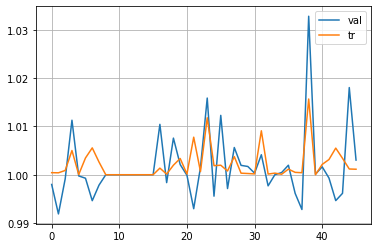

In [139]:
from matplotlib import pyplot as plt
plt.plot(res['mse_val'] / mse_val_all)
plt.plot(res['mse_tr'] / mse_tr_all)
plt.legend(['val', 'tr'])
plt.grid()

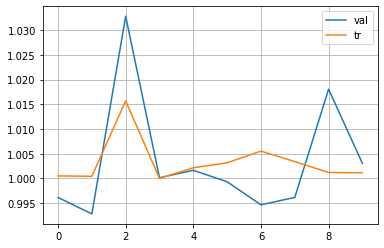

In [145]:
from matplotlib import pyplot as plt
plt.plot((res['mse_val'] / mse_val_all).values[-10:])
plt.plot((res['mse_tr'] / mse_tr_all).values[-10:])
plt.legend(['val', 'tr'])
plt.grid()

In [202]:
from tqdm import tqdm
data = []
for i in tqdm(range(2000)):
    x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3)

    reg = LinearRegression().fit(x_tr, y_tr)
    y_train_pred = reg.predict(x_tr)
    y_val_pred = reg.predict(x_val)

    data.append({'mse_tr': mse(y_tr, y_train_pred) ** 0.5, 
                 'mse_val': mse(y_val, y_val_pred) ** 0.5})

100%|████████████████████████████████████| 2000/2000 [00:21<00:00, 93.84it/s]


In [203]:
pd.DataFrame(data).mean()

mse_tr     0.134796
mse_val    0.155501
dtype: float64

In [204]:
print((res['mse_val'] / mse_val_all).argmin())
worst = (res['mse_val'] / mse_val_all).argmin()

x_train_small = np.delete(x_train, worst, axis=1)
x_tset_small = np.delete(x_test, worst, axis=1)


# x_train_small = x_train[:,(res['mse_val'] / mse_val_all) > 0.99995]
# x_test_small = x_test[:,(res['mse_val'] / mse_val_all) > 0.99995]

x_train_small.shape

1


(1460, 45)

In [205]:
from tqdm import tqdm
data = []
for i in tqdm(range(2000)):
    x_tr, x_val, y_tr, y_val = train_test_split(x_train_small, y_train, test_size=0.3)

    reg = LinearRegression().fit(x_tr, y_tr)
    y_train_pred = reg.predict(x_tr)
    y_val_pred = reg.predict(x_val)

    data.append({'mse_tr': mse(y_tr, y_train_pred) ** 0.5, 
                 'mse_val': mse(y_val, y_val_pred) ** 0.5})

100%|████████████████████████████████████| 2000/2000 [00:20<00:00, 97.06it/s]


In [206]:
pd.DataFrame(data).mean()

mse_tr     0.135403
mse_val    0.155391
dtype: float64

# 
$$y = x * b + e$$

Хочемо додати $sin(x)$ і $cos(x)$. Чи можна додавати $sin(x+\alpha)$? 

$$y = x * b + a * sin(x) + c * cos(x) + e$$

In [246]:
n = 10000
X = np.zeros((n, 4))

x = np.random.rand(n) * 3
X[:, 0] = x
X[:, 1] = np.sin(x)
X[:, 2] = np.cos(x)
X[:, 3] = np.cos(x + 0.5)

In [247]:
np.corrcoef(X.T)

array([[ 1.        ,  0.17352583, -0.99362323, -0.97680877],
       [ 0.17352583,  1.        , -0.14520998, -0.35419069],
       [-0.99362323, -0.14520998,  1.        ,  0.97669321],
       [-0.97680877, -0.35419069,  0.97669321,  1.        ]])

In [248]:
np.linalg.inv(X.T.dot(X))

array([[ 2.80829768e-05, -2.11347621e-04,  3.35472414e-04,
        -3.28762966e-04],
       [-2.29496338e-04,  3.15901850e+10, -5.78254458e+10,
         6.58917443e+10],
       [ 3.49003171e-04, -5.78254458e+10,  1.05848768e+11,
        -1.20614029e+11],
       [-3.62396240e-04,  6.58917443e+10, -1.20614029e+11,
         1.37438953e+11]])

In [250]:
np.linalg.det(X.T.dot(X))

646.0074916218717